In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOS

In [16]:
# 3
#Primero normalizamos los pixeles de las imagenes para que matplotlib as pueda leer
def normalize_image(image):

    image = image.astype("float32")
    image = image / 255.0

    return image

train_image_generator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
validation_image_generator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_image_generator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size)
test_data_gen = test_image_generator.flow_from_directory(
    PATH,   #Lo buscamos desde el PATH general y usamos 'classes' para leer solo el de test, poes poniendo 'test_dir' no estaba funcionando
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    classes=['test'],
    shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


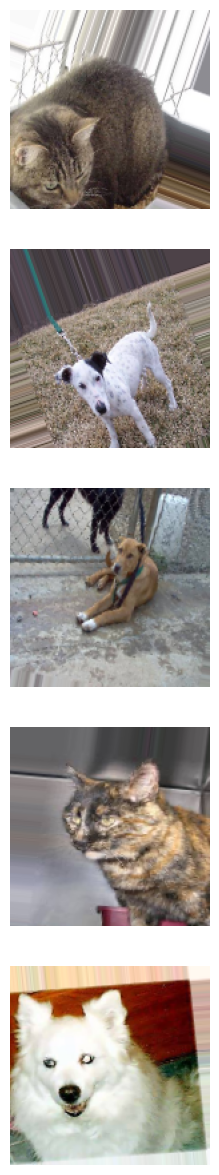

In [17]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [18]:
# 5
train_image_generator = train_image_generator = ImageDataGenerator(  #Se recrea por peticion del enunciado, pero poner todo en uno solo es suficiente
    rescale=1.0 / 255.0,
    rotation_range=20,      #Las transformaciones ayudan a evitar overfitting
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


Found 2000 images belonging to 2 classes.


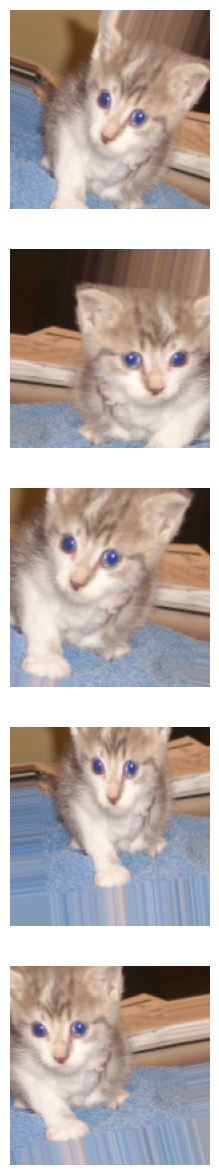

In [19]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [51]:
# 7
from tensorflow.keras.layers import Input

model = Sequential()

model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3))) #We will process 32 filters of size 3x3 over our input data.
model.add(MaxPooling2D((2,2))) #Performs the MaxPooling using 2x2 samples and a stride of 2.
#The other layers do similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64.
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

#Adding Dense layers (we need to take the extracted feature and add a way to classify them)

model.add(Flatten())  # 256
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #2 classes available, the '1' works for binary classification problems

model.summary()

#TRAINING
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Compila el modelo con la función de pérdida binary_crossentropy, pues para clasificar imágenes con etiquetas binarias, debes usar una función de pérdida que espere etiquetas en el rango de [0, 1)
              metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 17, 17, 128)     

In [52]:
# 8

from math import ceil #para calcular los step_per_epoch y validation_steps

history = model.fit(x=train_data_gen, steps_per_epoch=int(ceil(1. * total_train / batch_size)), #train_steps
                    epochs=epochs,  #We call it history so we can access the statistic from it later
                    validation_data=val_data_gen,
                    validation_steps= int(ceil(1. * total_val / batch_size))
                    )

Epoch 1/15
16/16 [==============================] - 114s 7s/step - loss: 0.9462 - accuracy: 0.5090 - val_loss: 0.7055 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 114s 7s/step - loss: 0.6917 - accuracy: 0.5300 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 3/15
16/16 [==============================] - 115s 7s/step - loss: 0.6836 - accuracy: 0.5620 - val_loss: 0.7110 - val_accuracy: 0.5000
Epoch 4/15
16/16 [==============================] - 116s 7s/step - loss: 0.6656 - accuracy: 0.5980 - val_loss: 0.7193 - val_accuracy: 0.5000
Epoch 5/15
16/16 [==============================] - 116s 7s/step - loss: 0.6429 - accuracy: 0.6575 - val_loss: 0.7574 - val_accuracy: 0.5000
Epoch 6/15
16/16 [==============================] - 115s 7s/step - loss: 0.6205 - accuracy: 0.6505 - val_loss: 0.7895 - val_accuracy: 0.5000
Epoch 7/15
16/16 [==============================] - 116s 7s/step - loss: 0.6144 - accuracy: 0.6675 - val_loss: 0.8481 - val_accuracy: 0.5000
Epoch 8/15
16

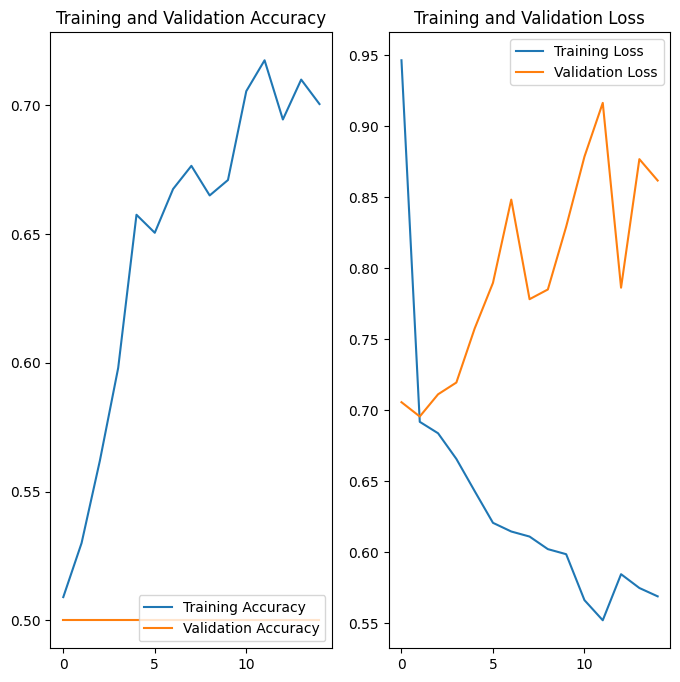

In [53]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
#Now it is time to use your model to predict whether a brand new image is a cat or a dog.
probabilities = model.predict(test_data_gen).flatten()
probabilities
#Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

1/1 [==============================] - 1s 1s/step


array([0.64513063, 0.27762386, 0.07888083, 0.7100782 , 0.63646626,
       0.42644864, 0.4486612 , 0.27825353, 0.77325255, 0.9523932 ,
       0.42621717, 0.6633329 , 0.33972445, 0.27530876, 0.32096496,
       0.8909411 , 0.71836877, 0.7315749 , 0.68760896, 0.71364564,
       0.2954403 , 0.31736943, 0.6104921 , 0.7930906 , 0.55647784,
       0.35105467, 0.893252  , 0.29656804, 0.357802  , 0.6031037 ,
       0.3726719 , 0.22894822, 0.86794734, 0.9970592 , 0.42369804,
       0.7072197 , 0.9462645 , 0.65925294, 0.34725043, 0.51653624,
       0.4808155 , 0.24249424, 0.98307836, 0.6707175 , 0.26955286,
       0.37288445, 0.36924633, 0.23905165, 0.57172567, 0.7438797 ],
      dtype=float32)

In [55]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 80.0% of the images of cats and dogs.
You passed the challenge!
